El objetivo de esta tercera y última parte será crear una Api de tipo Rest para usar nuestro modelo predictivo de platos aportando su valor nutricional y la receta

Para ello conectamos con el drive para acceder a los archivos que necesitaremos (imagenes de prueba, modelo, csv, algunas funciones si procede...)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore") #evitamos posibles warnings

Importaremos una función que usaremos para predecir, dar el valor nutricional y la receta todo a la vez depurando así el código haciendolo más limpio y organizado

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/')

import utils
from utils import obtener_info_completa



Estas serán algunas librerias que de obligado usaremos

In [4]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd

Vamos a cargar todo lo que necesitamos para este apartado que sera la ruta del modelo que usaremos, así como la del data para acceder a nuestra base de datos creada para obtener los valore nutricionales y la receta de cada plato. También importaremos la función donde obtendremos todo esto.

In [5]:
# Cargo modelo y dataset
model_path = "/content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/mobilenet_food101_checkpoint.h5"
data_path = "/content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/food_nutrition_data.csv"

model = tf.keras.models.load_model(model_path)
data = pd.read_csv(data_path)



Probamos la función con la imagen de una paella

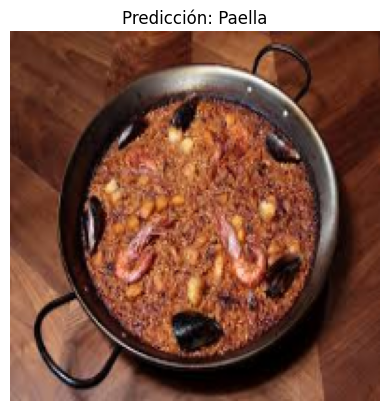


🍽️ Plato: Paella

🔥 Calorías: 3507.0 kcal
🛢️ Grasas: 120.76 g
🍞 Carbohidratos: 370.28 g
💪 Proteínas: 211.34 g

📜 Ingredientes: - chorizo (400 g quality chorizo)
- onion (1 small onion)
- peppers (50 g jarred piquillo peppers)
- parsley (½ a bunch of fresh flat-leaf parsley)
- chicken drumettes (22 free-range chicken drumettes)
- extra virgin olive oil (2 tablespoons extra virgin olive oil)
- smoked paprika (1 teaspoon smoked paprika)
- tomato pureé (2 tablespoon tomato pureé)
- rice (400 g Bomba paella rice)
- white wine (120 ml white wine)
- chicken stock (750 ml organic chicken stock)
- frozen peas (200 g frozen peas)
- lemon (1 lemon)

📌 URL Receta: http://www.jamieoliver.com/recipes/chicken-recipes/chicken-paella/


In [6]:
# Ruta de la imagen a predecir
ruta_imagen = "/content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/imagenes_prueba/paella.jpg"

#  predicción
resultado = obtener_info_completa(ruta_imagen, model, data)

Instalaremos algunas librerías que nos haran falta para desarrolar nuestra API

In [7]:
!pip install uvicorn
!pip install fastapi
!pip install pyngrok
!pip install python-multipart

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.8 MB/s eta 0:00:00


Como siempre guardamos nuestro token de ngrok de forma segura

Agrego mi authtoken al archivo de configuración predeterminado de ngrok. Esto evita que tenga que ingresarlo manualmente cada vez que inicie un túnel.

Después de ejecutarlo, ngrok recordará el token automáticamente.

In [8]:
!pip install load_dotenv

In [9]:
ruta_env = "/content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/.env"

In [ ]:

import getpass




# Pido el token de ngrok de forma segura
token_ngrok = getpass.getpass("Introduce tu token_ngrok: ")

# Guardo el token en el archivo .env
with open(ruta_env, "w") as f:
    f.write(f"TOKEN_NGROK={token_ngrok}\n")

print(f" Archivo .env guardado en {ruta_env}")



Introduce tu token_ngrok: ··········
 Archivo .env guardado en /content/drive/MyDrive/tokio/deep_learning/proyecto_final_foodAi/.env


In [10]:
from dotenv import load_dotenv


#Cargo el .env para obtener el token
load_dotenv(ruta_env)
token_guardado_ngrok = os.getenv("TOKEN_NGROK")

# Agrego el authtoken correctamente
!ngrok config add-authtoken $token_guardado_ngrok

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


 URL pública de la API: https://b749-35-194-154-176.ngrok-free.app


INFO:     Started server process [462]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     92.56.176.125:0 - "GET / HTTP/1.1" 200 OK
INFO:     92.56.176.125:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     92.56.176.125:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     92.56.176.125:0 - "GET /openapi.json HTTP/1.1" 200 OK
📥 Imagen recibida
🖼️ Imagen guardada en /tmp/temp_image.jpg


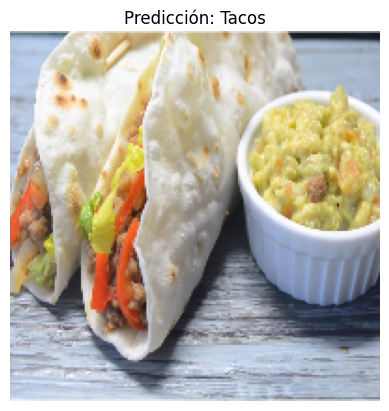


🍽️ Plato: Tacos

🔥 Calorías: 221.0 kcal
🛢️ Grasas: 12.65 g
🍞 Carbohidratos: 16.2 g
💪 Proteínas: 10.88 g

📜 Ingredientes: - Vegetable Oil (2 tsp Vegetable Oil (picadillo))
- white onion (1/2 x white onion (large), chopped (1 1/2 cups) (picadillo))
- Ground Chuck (1 lb Ground Chuck (80 percent lean) (picadillo))
- garlic (1 tbsp minced garlic cloves(1 to 2 cloves) (picadillo))
- tomatoes (2 x tomatoes (medium), diced (2 3/4 cups) (picadillo))
- Paprika (1 1/2 tsp Paprika (picadillo))
- ancho chile powder (1 tsp ancho chile powder (picadillo))
- Dried Oregano (1 tsp Dried Oregano (picadillo))
- coarse salt (1 tsp coarse salt (picadillo))
- ground pepper (1 tsp freshly ground pepper (picadillo))
- Cumin (3/4 tsp Ground Cumin (picadillo))
- water (1 1/2 cup water (picadillo))
- White Vinegar (3 tsp White Vinegar (picadillo))
- vegetable oil (vegetable oil for frying (tacos))
- Corn Tortillas (20 x Corn Tortillas (tacos))
- Iceberg Lettuce (Iceberg Lettuce Shredded,for serving (tacos))
- wh

In [ ]:
import uvicorn
from fastapi import FastAPI, UploadFile, File, HTTPException
from tensorflow.keras.preprocessing import image
from pyngrok import ngrok
from io import BytesIO
import nest_asyncio
import logging
import absl.logging
import re
import cv2


absl.logging.set_verbosity(absl.logging.ERROR)

app = FastAPI()

@app.get("/")
def get_root():
    return {"message": "API funcionando. Ve a /docs para ver la documentación"}


@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        print("📥 Imagen recibida")

        # Leer la imagen en memoria
        contents = await file.read()
        img_array = np.frombuffer(contents, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        if img is None:
            raise ValueError("La imagen no pudo ser decodificada correctamente.")

        # Guardar la imagen en un archivo temporal
        temp_filename = "/tmp/temp_image.jpg"
        cv2.imwrite(temp_filename, img)

        print(f"🖼️ Imagen guardada en {temp_filename}")


        resultado = obtener_info_completa(temp_filename, model, data)

        return resultado

    except Exception as e:
        print("❌ Error en la predicción:", str(e))
        raise HTTPException(status_code=500, detail=str(e))

tunnel = ngrok.connect(8000)
print(f" URL pública de la API: {tunnel.public_url}")

nest_asyncio.apply()
uvicorn.run(app, host="0.0.0.0", port=8000)

